<a href="https://colab.research.google.com/github/Mir-Safwan-Marzouq/Deep-Learning/blob/main/14_Transfer%20Learning/Problem_of_pretrained_model_in_general_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

import PIL
import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
IMAGE_SHAPE=(224,224)
# IMAGE_SHAPE+(3,) will make it 224 by 224 by 3
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

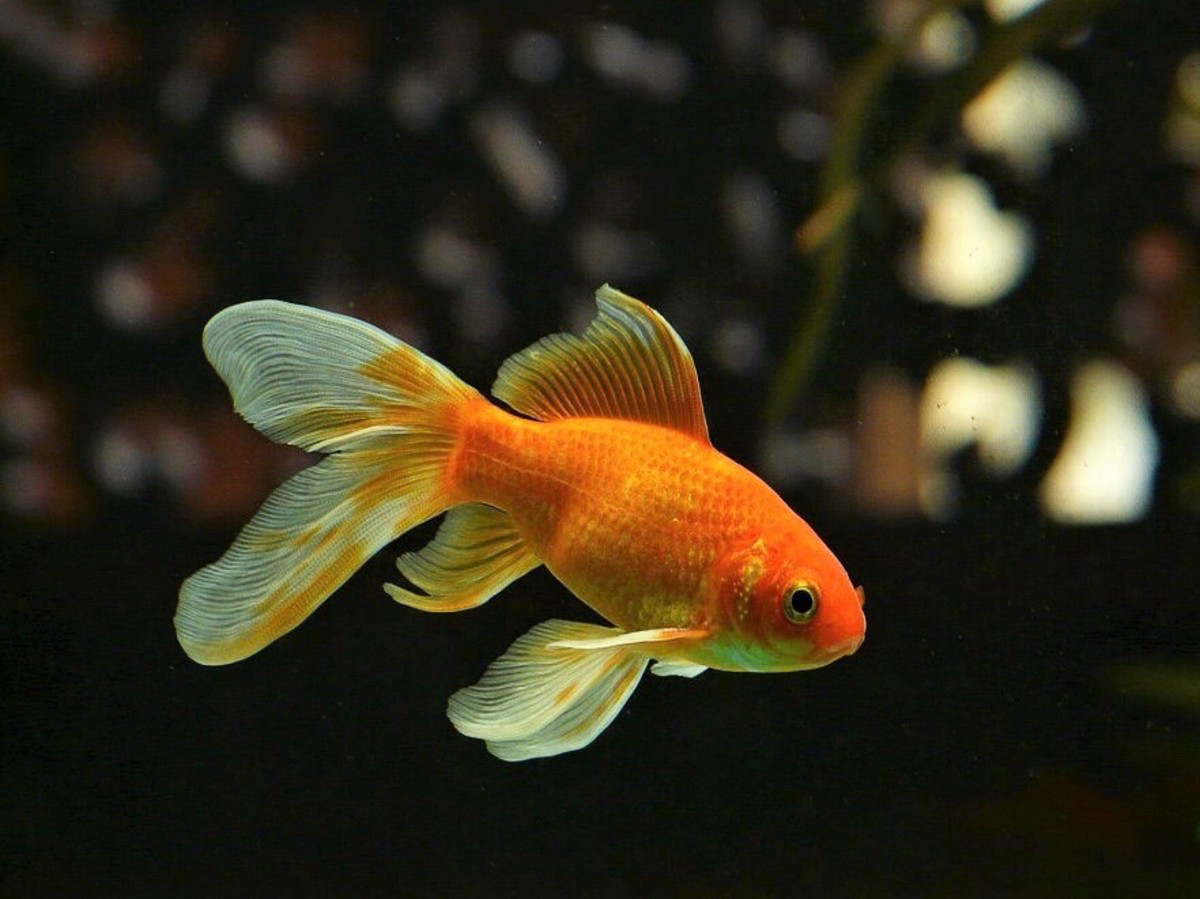

In [5]:
Image.open('goldfish.jpg')

In [6]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)

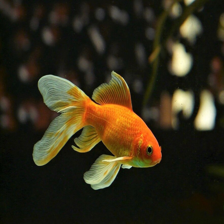

In [7]:
gold_fish

In [8]:
gold_fish = np.array(gold_fish)/255.0

In [9]:
gold_fish.shape

(224, 224, 3)

In [10]:
gold_fish

array([[[0.24313725, 0.2       , 0.17254902],
        [0.23137255, 0.19607843, 0.16862745],
        [0.21176471, 0.18431373, 0.15294118],
        ...,
        [0.05882353, 0.0745098 , 0.04705882],
        [0.05490196, 0.0627451 , 0.03529412],
        [0.05490196, 0.05882353, 0.02745098]],

       [[0.21960784, 0.2       , 0.17254902],
        [0.23137255, 0.2       , 0.17254902],
        [0.22745098, 0.18431373, 0.16078431],
        ...,
        [0.05490196, 0.07058824, 0.04313725],
        [0.04705882, 0.05490196, 0.02745098],
        [0.05490196, 0.05882353, 0.02745098]],

       [[0.21568627, 0.21568627, 0.19215686],
        [0.22352941, 0.20392157, 0.17647059],
        [0.23137255, 0.18823529, 0.16470588],
        ...,
        [0.05098039, 0.06666667, 0.03921569],
        [0.05490196, 0.05882353, 0.03137255],
        [0.05490196, 0.05882353, 0.02745098]],

       ...,

       [[0.03921569, 0.05098039, 0.00392157],
        [0.04705882, 0.05490196, 0.01568627],
        [0.04313725, 0

In [11]:
gold_fish[np.newaxis, ...].shape
# adding another dimension; the reason I am doing is that when you do prediction, prediction accepts multiple images
# as input. you can not have like only one image as an input; that's the reason I am adding another axis

(1, 224, 224, 3)

In [12]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 1s 916ms/step


array([[ 0.22614977,  2.8054    , 10.86042   , ..., -1.7030525 ,
         0.563903  , -0.30993015]], dtype=float32)

In [13]:
result.shape

(1, 1001)

In [15]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [16]:
labels = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

10484/10484 [==============================] - 0s 1us/step


In [17]:
labels

'/root/.keras/datasets/ImageNetLabels.txt'

In [18]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [19]:
image_labels[predicted_label_index]

'goldfish'

Load Flowers Dataset

In [20]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 2s 0us/step


In [21]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [22]:
list(data_dir.glob('*/*.jpg'))[:5] #used pathlib so that I can do function like this

[PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg')]

In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [24]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg')]

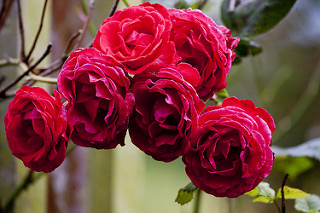

In [25]:
Image.open(str(roses[1]))

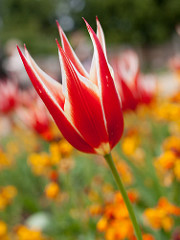

In [26]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [27]:
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/15052586652_56a82de133_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16938892686_3613ea68e8_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2280950463_86510c2789_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16862351376_f0fcc6fc91_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/402525114_eaa60c8341_m.jpg')]

In [28]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg')]

In [31]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5398974188_799753449c.jpg'

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [33]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [34]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [35]:
X[0]

array([[[165, 185, 188],
        [171, 202, 206],
        [165, 188, 190],
        ...,
        [ 18,  25,  28],
        [ 18,  25,  28],
        [ 17,  24,  27]],

       [[160, 189, 193],
        [181, 204, 205],
        [164, 193, 198],
        ...,
        [ 18,  24,  29],
        [ 17,  24,  27],
        [ 16,  23,  26]],

       [[162, 195, 196],
        [175, 200, 205],
        [157, 187, 192],
        ...,
        [ 17,  23,  28],
        [ 17,  24,  27],
        [ 17,  24,  27]],

       ...,

       [[ 26,  31,  30],
        [ 27,  32,  31],
        [ 26,  31,  30],
        ...,
        [  6,  10,  10],
        [  5,  11,  10],
        [  5,  10,  11]],

       [[ 25,  30,  29],
        [ 27,  32,  31],
        [ 25,  30,  29],
        ...,
        [  7,  11,  12],
        [  8,  12,  12],
        [  7,  10,  11]],

       [[ 27,  31,  30],
        [ 27,  31,  30],
        [ 28,  32,  31],
        ...,
        [  7,  11,  12],
        [  8,  10,  11],
        [  7,   9,   9]]

In [36]:
X = np.array(X)
y = np.array(y)

In [37]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
# preprocessing scale images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [39]:
X[0].shape

(224, 224, 3)

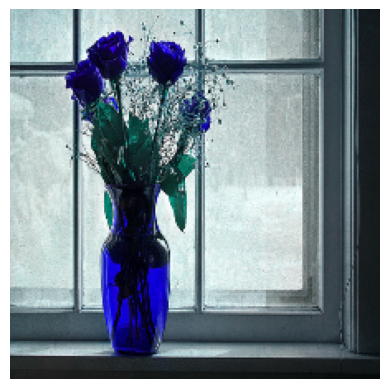

In [40]:
plt.axis('off')
plt.imshow(X[0])

In [41]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))


1/1 [==============================] - 1s 1s/step


In [42]:
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 722, 722])

In [43]:
image_labels[795]

'shower curtain'

In [44]:
image_labels[722]

'pillow'

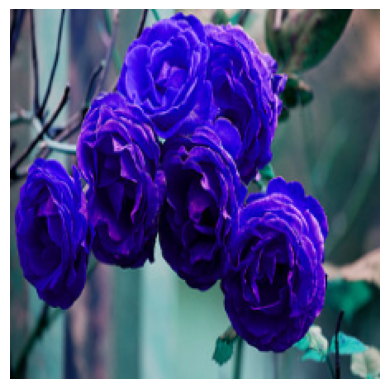

In [45]:
plt.axis('off')
plt.imshow(X[1])